In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tallas.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


In [4]:
talla_map = {'L': 1, 'M':0}
data['color'] = data['talla'].map(talla_map)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
color,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


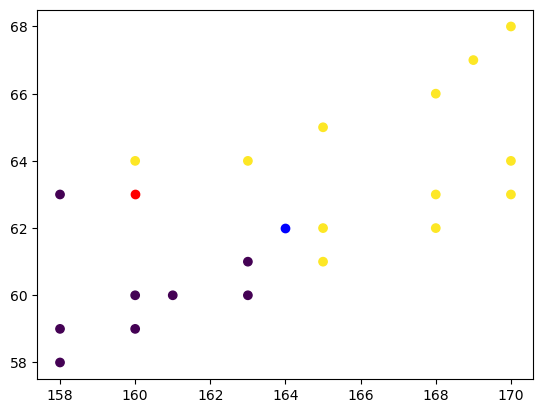

In [5]:
new = pd.DataFrame([[160, 63, None, None]])
new.columns = data.columns
new2 = pd.DataFrame([[164, 62, None, None]])
new2.columns = data.columns
plt.scatter(data['altura'], data['peso'], c=data['color'])
plt.scatter(new['altura'], new['peso'], c='r')
plt.scatter(new2['altura'], new2['peso'], c='b')
plt.show()

In [6]:
def get_closest_points(data, point, k=5):
    data_i = data.iloc[:, 0:2].values
    point_i = point.iloc[:, 0:2].values
    talla = data['talla'].values
    dist = [[i, np.linalg.norm(data_i[i] - point_i), talla[i]] for i in range(len(data_i))]
    dist = pd.DataFrame(dist)
    dist.columns = ['index', 'dist', 'talla']
    return dist.sort_values('dist').head(k)

In [7]:
c = get_closest_points(data, new)
c

,index,dist,talla
17,17,1.000000,L
4,4,2.000000,M
5,5,3.000000,M
19,19,3.162278,L
14,14,3.162278,M


In [8]:
def show_closest_points(data, point, cercanos, color='k'):
    plt.scatter(data['altura'], data['peso'], c=data['color'])
    plt.scatter(point['altura'], point['peso'], c=color)
    for c in cercanos.values:
        p = data.loc[c[0], :]
        plt.plot([point['altura'].values[0], p.altura], [point['peso'].values[0], p.peso])
    plt.show()

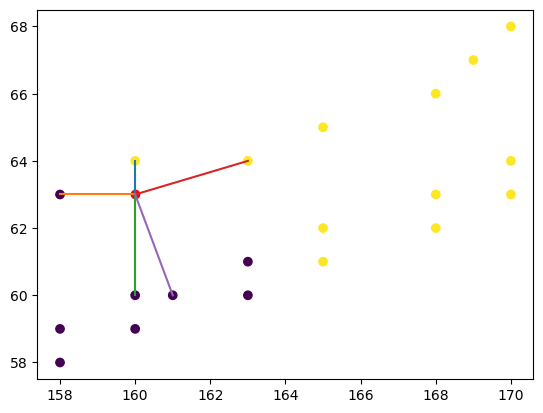

In [9]:
show_closest_points(data, new, c, 'r')

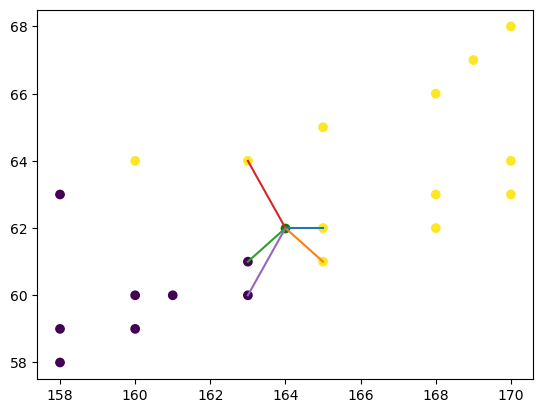

In [10]:
c = get_closest_points(data, new2)
c
show_closest_points(data, new2, c, 'g')

## **Tarea**:
Demuestra que para $0 < \alpha < 1 $, se cumple que
$$
1 = \sum_{i=1}^{\infty} \alpha (1 - \alpha)^{i-1}
$$

# Demostración de la Serie Geométrica

Para demostrar que, para $ 0 < \alpha < 1 $,

$$
1 = \sum_{i=1}^{\infty} \alpha (1 - \alpha)^{i-1},
$$

procedemos de la siguiente manera:

#### Identificación de la Serie Geométrica

La serie dada es una **serie geométrica infinita**, donde cada término se obtiene multiplicando el término anterior por una razón constante.

En este caso:

- **Primer término (\( a \))**: Cuando \( i = 1 \),
  
$$
  a = \alpha (1 - \alpha)^{1-1} = \alpha (1 - \alpha)^0 = \alpha \cdot 1 = \alpha.
$$

- **Razón (\( r \))**: Es el factor por el cual se multiplica cada término para obtener el siguiente. Observamos que:
  
  $$
  \frac{\text{Término } (i+1)}{\text{Término } i} = \frac{\alpha (1 - \alpha)^{(i+1)-1}}{\alpha (1 - \alpha)^{i-1}} = 1 - \alpha.
  $$
  
  Por lo tanto, la razón es $ r = 1 - \alpha $.

#### Condición de Convergencia

Una serie geométrica infinita converge si y solo si \( |r| < 1 \). En nuestro caso:

$$
|1 - \alpha| < 1.
$$

Dado que $ 0 < \alpha < 1 $, se cumple:

$$ (0 < \alpha < 1 )(-1)$$

$$ 1+0 > 1-\alpha > -1 + 1$$
$$ 1> 1-\alpha > 0$$
Por lo tanto, la serie converge.

#### Cálculo de la Suma de la Serie Geométrica Infinita

La suma \( S \) de una serie geométrica infinita con primer término \( a \) y razón \( r \) es:

$$
S = \frac{a}{1 - r}
$$

Aplicando esto a nuestra serie:
$$
S = \frac{\alpha}{1 - (1 - \alpha)} = \frac{\alpha}{\alpha} = 1.
$$

#### Conclusión

Hemos demostrado que:

$$
1 = \sum_{i=1}^{\infty} \alpha (1 - \alpha)^{i-1},
$$

para todo $0 < \alpha < 1 $.
